In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("./train_path_label.csv")


In [3]:
age = data["img_path"].str
data["age"] = age.split("/").str[0].str.split("_").str[-1]
sorted_age = pd.DataFrame({"age": data["age"].sort_values().astype(int)})


<Axes: xlabel='age', ylabel='count'>

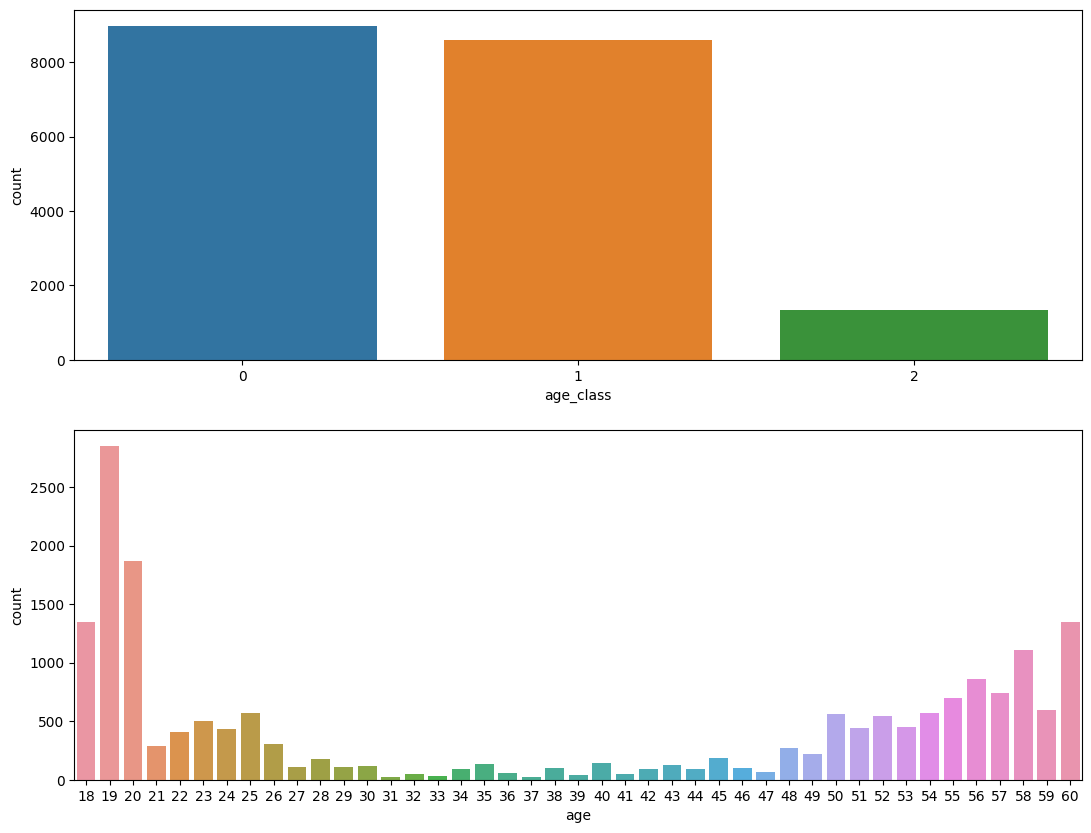

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(13, 10))
sns.countplot(data, x="age_class", ax=ax[0])
sns.countplot(sorted_age, x="age", ax=ax[1])


<Axes: xlabel='age'>

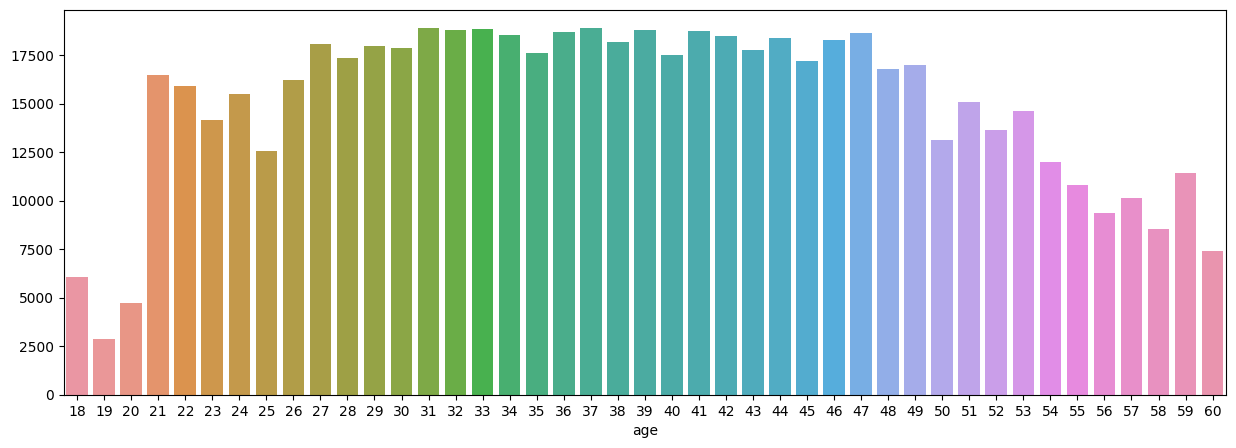

In [5]:
fix, ax = plt.subplots(1, 1, figsize=(15, 5))
cumulative_age = sorted_age.value_counts().cumsum()
sns.barplot(x=cumulative_age.index.get_level_values(0), y=cumulative_age.values, ax=ax)


In [6]:
data["re_age_class1"] = data["age"].astype(int).apply(lambda age: 0 if age < 30 else (1 if 30 <= age < 59 else 2))
data["re_age_class2"] = data["age"].astype(int).apply(lambda age: 0 if age < 30 else (1 if 30 <= age < 58 else 2))
data["re_age_class3"] = data["age"].astype(int).apply(lambda age: 0 if age < 29 else (1 if 29 <= age < 58 else 2))


Text(0.5, 1.0, 'class0 < 29, 29 <= class1 < 58, 58 <= class2')

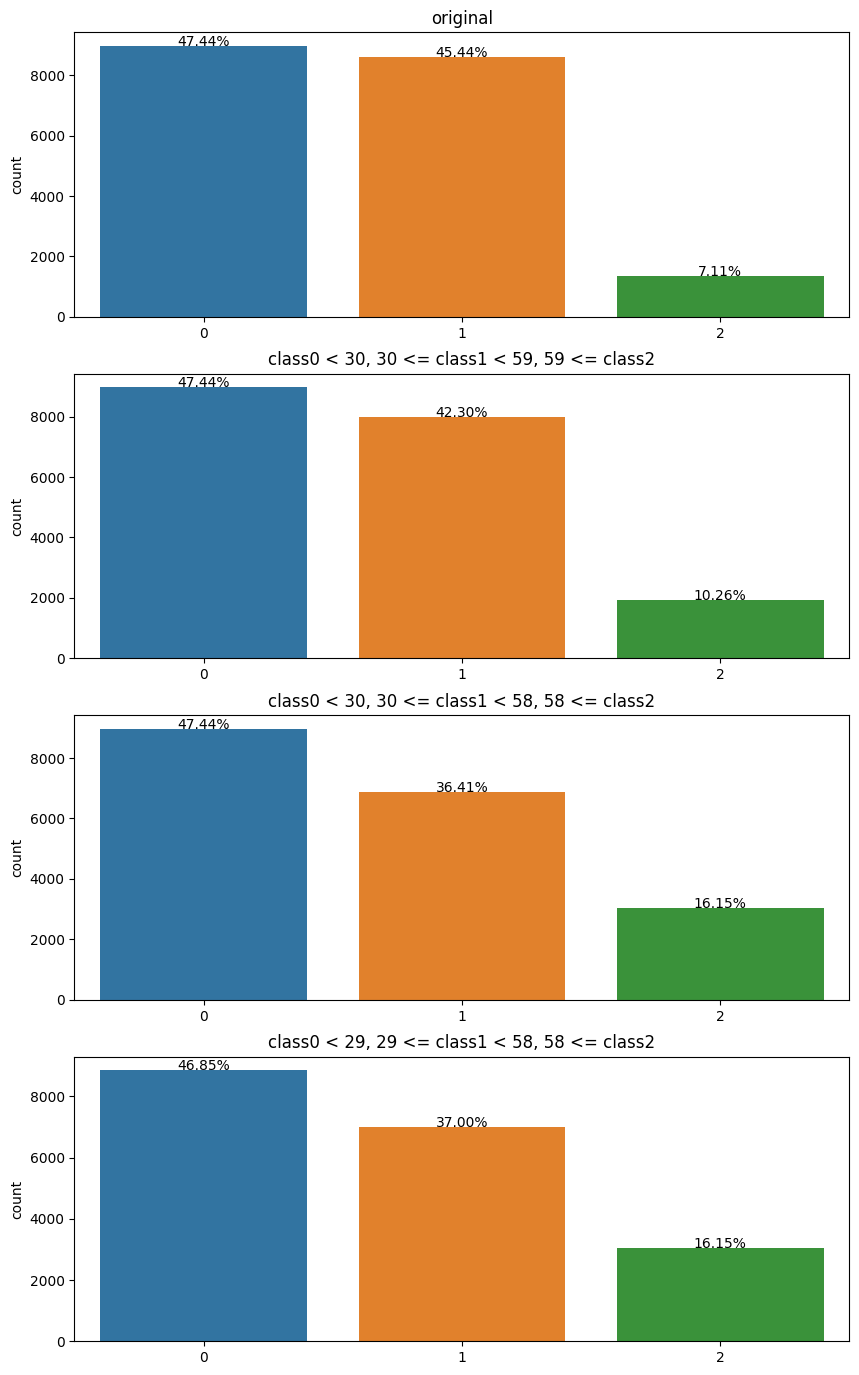

In [7]:
fig, ax = plt.subplots(4, 1, figsize=(10, 17))
sns.countplot(data, x="age_class", ax=ax[0])
total = len(data["age_class"])
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2.0, height, "{0:.2f}%".format(height / total * 100), ha="center")
ax[0].set_xlabel("")
ax[0].set_title("original")

sns.countplot(data, x="re_age_class1", ax=ax[1])
total = len(data["re_age_class1"])
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2.0, height, "{0:.2f}%".format(height / total * 100), ha="center")
ax[1].set_xlabel("")
ax[1].set_title("class0 < 30, 30 <= class1 < 59, 59 <= class2")

sns.countplot(data, x="re_age_class2", ax=ax[2])
total = len(data["re_age_class2"])
for p in ax[2].patches:
    height = p.get_height()
    ax[2].text(p.get_x() + p.get_width() / 2.0, height, "{0:.2f}%".format(height / total * 100), ha="center")
ax[2].set_xlabel("")
ax[2].set_title("class0 < 30, 30 <= class1 < 58, 58 <= class2")

sns.countplot(data, x="re_age_class3", ax=ax[3])
total = len(data["re_age_class3"])
for p in ax[3].patches:
    height = p.get_height()
    ax[3].text(p.get_x() + p.get_width() / 2.0, height, "{0:.2f}%".format(height / total * 100), ha="center")
ax[3].set_xlabel("")
ax[3].set_title("class0 < 29, 29 <= class1 < 58, 58 <= class2")
